In [1]:
import seaborn as sns
import bokeh.plotting as blt
import bokeh.models as bmod
import matplotlib as mpl
import matplotlib.cm as cm
from statsmodels.api import formula as sm
import sklearn as sk
from sklearn import tree
import pydotplus
from IPython.display import Image
import matplotlib
import matplotlib.cm as cm

def standardize(x):
    '''Use on a pd.series'''
    
    mn = np.nanmean(x)
    sd = np.nanstd(x)
    
    x2 = (x-mn)/sd
    
    return x2

In [4]:
site = 'Nr1'
exname = 'smex7'

In [31]:
data = pd.read_hdf('./data/Nr1_smex7_test_long_melt_test.hdf','df') # load the first experiment
data.peakSWE *= 1000. # convert m to mm
data.SMR *= 1000. # convert m/d to mm/d
data.MAP *= 1000. # convert m to mm

In [32]:
data.shape

(50000, 30)

In [33]:
data.columns

Index([u'SMR', u'TpeakSWE', u'peakSWE', u'ablSeas', u'Tnosnow', u'ref',
       u'date_ONS', u'DOAS', u'date_AS', u'idx', u'date_peakSWE', u'temp_out',
       u'MAP', u'ET', u'Q', u'Qbf', u'Qrf', u'rech', u'sat', u'p',
       u'rz_storage', u'rz_drainage', u'unsat_storage', u'unsat_drainage',
       u'sat_def', u'sat_def_z', u'sm', u'gwStore', u'gwFlux', u'ETRate'],
      dtype='object')

In [34]:
data['Pmodel'] = data['peakSWE'] + data['p'] # this is all of the precip data fed into the  model + peak swe
data['Pex'] = data['peakSWE'] + data['MAP'] # this is all of the precip that the model should see in liquid form + peak swe
data['wb'] = data['Pex'] - (data['ET']+data['Q'])
data['RR'] = data.Q/data.Pex
#data['Qerr'] = data.Q-data.streamflow
data['ablRR'] = data.Q/data.peakSWE
data['RR_ET'] = 1-data.ET/data.Pex
data['ablRR_ET'] = 1-(data.ET/data.peakSWE)

In [35]:
data.columns

Index([u'SMR', u'TpeakSWE', u'peakSWE', u'ablSeas', u'Tnosnow', u'ref',
       u'date_ONS', u'DOAS', u'date_AS', u'idx', u'date_peakSWE', u'temp_out',
       u'MAP', u'ET', u'Q', u'Qbf', u'Qrf', u'rech', u'sat', u'p',
       u'rz_storage', u'rz_drainage', u'unsat_storage', u'unsat_drainage',
       u'sat_def', u'sat_def_z', u'sm', u'gwStore', u'gwFlux', u'ETRate',
       u'Pmodel', u'Pex', u'wb', u'RR', u'ablRR', u'RR_ET', u'ablRR_ET'],
      dtype='object')

In [39]:
y = 'RR'
x = 'SMR'
c = 'TpeakSWE'
d = 'peakSWE'
print sm.ols('%s ~ %s + %s + %s + 1'%(y,x,c,d),data).fit().summary()

                            OLS Regression Results                            
Dep. Variable:                     RR   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                 4.777e+04
Date:                Thu, 01 Dec 2016   Prob (F-statistic):               0.00
Time:                        21:32:38   Log-Likelihood:             2.2643e+05
No. Observations:               50000   AIC:                        -4.528e+05
Df Residuals:                   49996   BIC:                        -4.528e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0288      0.000   -242.576      0.0

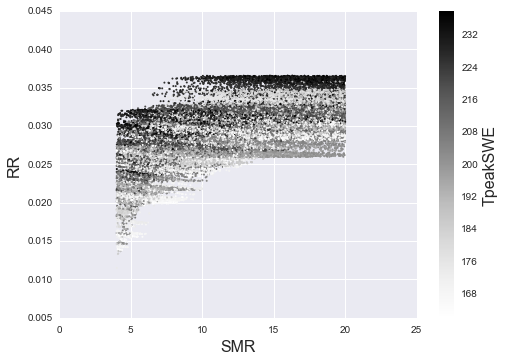

In [12]:
plt.scatter(data[x],data[y],s=4,c=data[c],edgecolors='none')
cb = plt.colorbar()
plt.xlabel(x, fontsize=16)
plt.ylabel(y, fontsize=16)
cb.set_label(c, fontsize=16)

In [13]:
data['closure'] = data.Pex - (data.ET + data.Q)

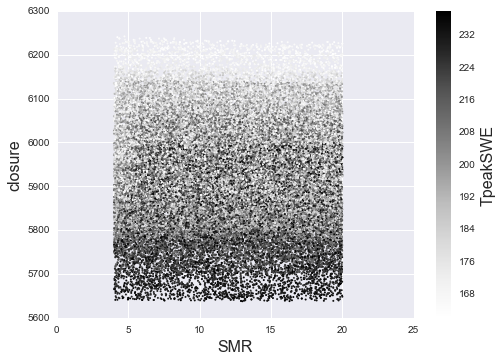

In [14]:
y = 'closure'
x = 'SMR'
c = 'TpeakSWE'
plt.scatter(data[x],data[y],s=4,c=data[c],edgecolors='none')
cb = plt.colorbar()
plt.xlabel(x, fontsize=16)
plt.ylabel(y, fontsize=16)
cb.set_label(c, fontsize=16)

In [29]:
y = 'ablRR_ET'
x = 'SMR'
c = 'TpeakSWE'
print sm.ols('%s ~ %s + 1'%(y,x),data).fit().summary()

                            OLS Regression Results                            
Dep. Variable:               ablRR_ET   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     920.6
Date:                Thu, 01 Dec 2016   Prob (F-statistic):          2.15e-200
Time:                        21:28:13   Log-Likelihood:                -30853.
No. Observations:               50000   AIC:                         6.171e+04
Df Residuals:                   49998   BIC:                         6.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1187      0.006    -20.961      0.0

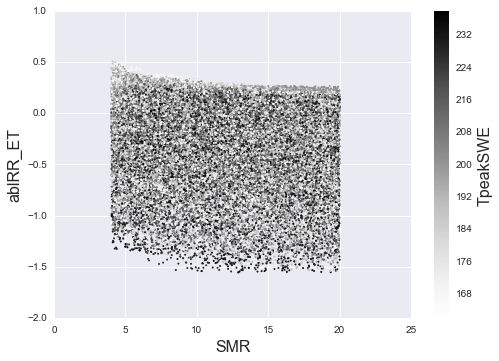

In [30]:
plt.scatter(data[x],data[y],s=4,c=data[c],edgecolors='none')
cb = plt.colorbar()
plt.xlabel(x, fontsize=16)
plt.ylabel(y, fontsize=16)
cb.set_label(c, fontsize=16)

In [17]:
y = 'gwStore'
x = 'SMR'
c = 'TpeakSWE'
print sm.ols('%s ~ %s + 1'%(y,x),data).fit().summary()

                            OLS Regression Results                            
Dep. Variable:                gwStore   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 4.676e+04
Date:                Thu, 01 Dec 2016   Prob (F-statistic):               0.00
Time:                        21:10:49   Log-Likelihood:            -3.5906e+05
No. Observations:               50000   AIC:                         7.181e+05
Df Residuals:                   49998   BIC:                         7.181e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2658.8764      4.017    661.868      0.0

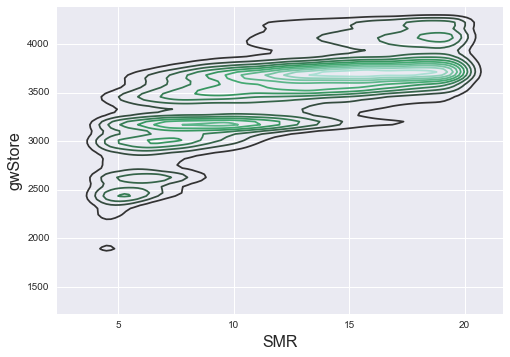

In [18]:
sns.kdeplot(data[x],data2=data[y])
#plt.scatter(data[x],data[y],s=4,c=data[c],edgecolors='none')
#cb = plt.colorbar()
plt.xlabel(x, fontsize=16)
plt.ylabel(y, fontsize=16)
cb.set_label(c, fontsize=16)

In [19]:
y = 'gwFlux'
x = 'SMR'
c = 'TpeakSWE'
print sm.ols('%s ~ %s + 1'%(y,x),data).fit().summary()

                            OLS Regression Results                            
Dep. Variable:                 gwFlux   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 4.676e+04
Date:                Thu, 01 Dec 2016   Prob (F-statistic):               0.00
Time:                        21:11:09   Log-Likelihood:                 81072.
No. Observations:               50000   AIC:                        -1.621e+05
Df Residuals:                   49998   BIC:                        -1.621e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3998      0.001    661.987      0.0

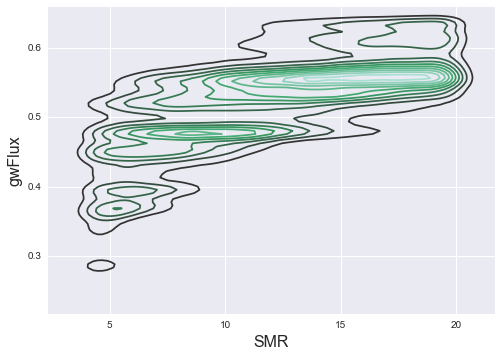

In [248]:
sns.kdeplot(data[x],data2=data[y])
#plt.scatter(data[x],data[y],s=4,c=data[c],edgecolors='none')
#cb = plt.colorbar()
plt.xlabel(x, fontsize=16)
plt.ylabel(y, fontsize=16)
cb.set_label(c, fontsize=16)

In [40]:
# create some normalized variables
data['SMR_peakSWE'] = data.SMR/data.peakSWE
data['SMR_TpeakSWE'] = data.SMR/data.TpeakSWE

# standardize variables
data['ablRR2'] = standardize(data.ablRR)
data['RR2'] = standardize(data.RR)
data['RR_ET2'] = standardize(data.RR_ET)
data['ablRR_ET2'] = standardize(data.ablRR_ET)
data['SMR2'] = standardize(data.SMR)
data['peakSWE2'] = standardize(data.peakSWE)
data['TpeakSWE2'] = standardize(data.TpeakSWE)
data['SMR_peakSWE2'] = standardize(data.SMR_peakSWE)
data['SMR_TpeakSWE2'] = standardize(data.SMR_TpeakSWE)

In [22]:
np.arange(5000,50000,500).shape

(90,)

In [47]:
r2 = []
error = []
p = []
scenarios = []
SMR_coef_min = []
SMR_coef_max = []
for i in np.arange(500,50000,1000):
    
    r2tmp = []
    ptmp = []
    smr_tmp = []
    for o in np.arange(0,50):
    
        mod1 = sm.ols('RR_ET2 ~ TpeakSWE2+ SMR2 + peakSWE2 + 1',data.iloc[np.random.randint(0,high=49999,size=i)]).fit()
        r2tmp.append(mod1.rsquared)
        ptmp.append(mod1.f_pvalue)
        smr_tmp.append(mod1.params['SMR2'])
        
    r2.append(np.mean(r2tmp))
    p.append(np.mean(ptmp))
    error.append(np.std(r2tmp))
    scenarios.append(i)
    SMR_coef_min.append(np.min(smr_tmp))
    SMR_coef_max.append(np.max(smr_tmp))

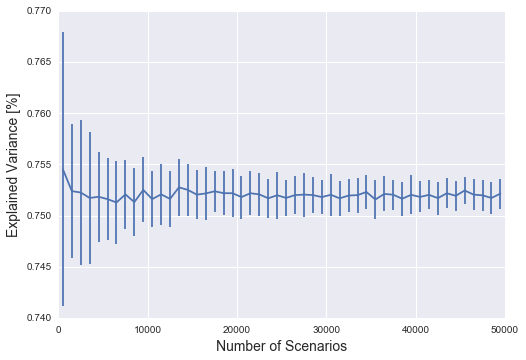

In [48]:
plt.errorbar(scenarios,r2,yerr=error)
plt.ylabel('Explained Variance [%]', fontsize = 14)
plt.xlabel('Number of Scenarios', fontsize = 14)
#plt.ylim(0.4,0.8)

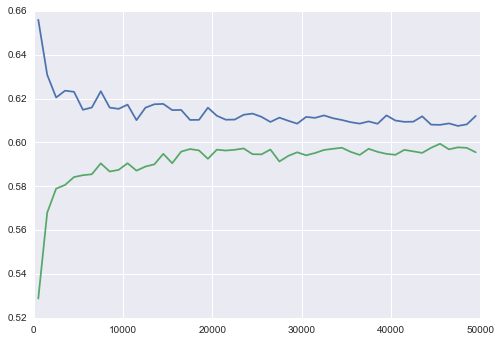

In [49]:
plt.plot(scenarios,SMR_coef_max,'-')
plt.plot(scenarios,SMR_coef_min,'-')

In [ ]:
mod1.rsquared

In [44]:
mod1 = sm.ols('RR_ET2 ~ TpeakSWE2+ SMR2 + peakSWE2 + 1',data).fit()
print mod1.summary()

                            OLS Regression Results                            
Dep. Variable:                 RR_ET2   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                 5.053e+04
Date:                Thu, 01 Dec 2016   Prob (F-statistic):               0.00
Time:                        21:35:04   Log-Likelihood:                -36090.
No. Observations:               50000   AIC:                         7.219e+04
Df Residuals:                   49996   BIC:                         7.222e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.703e-14      0.002   7.65e-12      1.0

In [175]:
y = 'RR_ET'
x = 'peakSWE'
print sm.ols('%s ~ %s + 1'%(y,x),data).fit().summary()

                            OLS Regression Results                            
Dep. Variable:                  RR_ET   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     5832.
Date:                Fri, 11 Nov 2016   Prob (F-statistic):               0.00
Time:                        15:04:24   Log-Likelihood:             1.8832e+05
No. Observations:               50000   AIC:                        -3.766e+05
Df Residuals:                   49998   BIC:                        -3.766e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0006   9.28e-05   1.08e+04      0.0

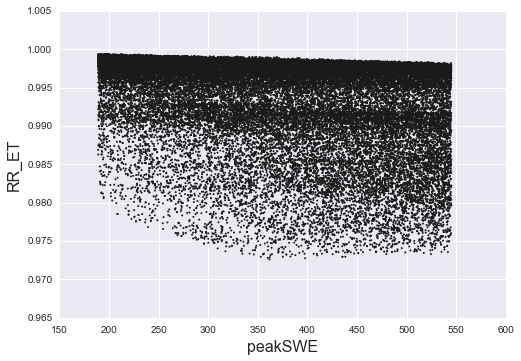

In [176]:
plt.scatter(data[x],data[y],s=4,edgecolors='none',c='0.1')
plt.xlabel(x, fontsize=16)
plt.ylabel(y, fontsize=16)

In [134]:
clf = tree.DecisionTreeRegressor(presort=True, max_depth=3)
fit = clf.fit(X=data[['SMR','TpeakSWE','peakSWE']].as_matrix(),y=data['RR_ET'].as_matrix())

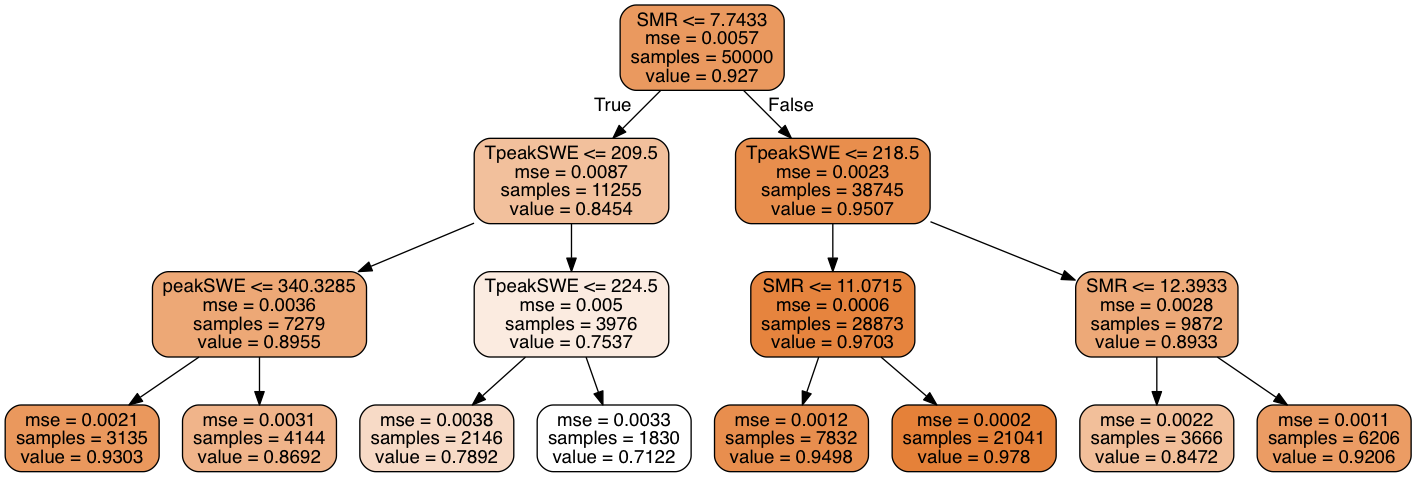

In [117]:
dot_data = tree.export_graphviz(fit, out_file=None,feature_names=['SMR','TpeakSWE','peakSWE'], filled=True, rounded=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [7]:
niwot = pd.read_pickle('../data/niwot_stats.pcl')

## Calculate some Color Metrics

In [8]:
data['Color'] = 'b'
data.loc[(data.SMR>190) & (data.RR>0.2),'Color'] = 'g'
data.loc[(data.SMR>150) & (data.RR<0.1),'Color'] = 'r' 

In [9]:
data['ASL'] = data.Tnosnow-data.TpeakSWE

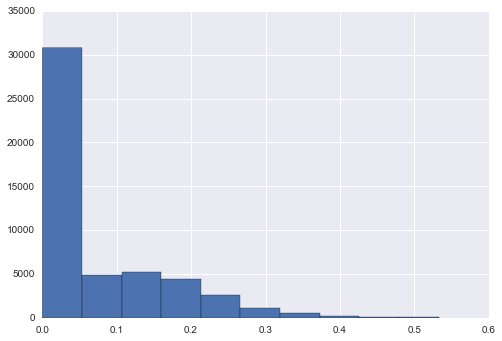

In [10]:
data.ablRR.hist()

In [11]:
data.describe()

,SMR,TpeakSWE,peakSWE,ablSeas,Tnosnow,ref,DOAS,idx,MAP,ET,...,unsat_drainage,sat_def,sat_def_z,sm,Pmodel,Pex,wb,RR,ablRR,ASL
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.000000,50000.000000,50000.000000,...,50000.0,5.000000e+04,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,12.080514,199.718280,365.677043,36.637440,236.355720,2010.0,15.0,24999.500000,237.865390,40.782837,...,0.0,5.478913e+03,11441.0,88.227309,368.554278,603.542434,537.374129,0.047113,0.068366,36.637440
std,4.575329,21.866204,102.470258,19.983106,29.005448,0.0,0.0,14433.901067,76.380473,38.323290,...,0.0,4.984104e-09,0.0,98.581263,102.561476,107.705146,145.530740,0.065215,0.092973,19.983106
min,4.000099,162.000000,189.004683,10.000000,173.000000,2010.0,15.0,0.000000,35.164315,3.920297,...,0.0,5.478913e+03,11441.0,0.000000,189.004683,320.961788,79.287647,0.000011,0.000021,10.000000
25%,8.121388,181.000000,277.275595,22.000000,214.000000,2010.0,15.0,12499.750000,173.164315,12.691004,...,0.0,5.478913e+03,11441.0,0.000000,279.996122,524.400944,439.766626,0.000184,0.000350,22.000000
50%,12.085537,200.000000,364.916011,31.000000,236.000000,2010.0,15.0,24999.500000,221.234875,22.491824,...,0.0,5.478913e+03,11441.0,25.724324,367.683290,601.662892,544.206016,0.008174,0.014427,31.000000
75%,16.031637,219.000000,453.806439,46.000000,256.000000,2010.0,15.0,37499.250000,292.656550,59.019916,...,0.0,5.478913e+03,11441.0,187.909005,456.767062,678.469202,641.312375,0.085488,0.125146,46.000000
max,19.999785,238.000000,544.999312,133.000000,318.000000,2010.0,15.0,49999.000000,426.476604,173.653103,...,0.0,5.478913e+03,11441.0,259.412264,568.930383,903.637398,891.335753,0.321393,0.532591,133.000000


In [12]:
data['Color'] = 'green'

In [13]:
tmp = sk.preprocessing.MinMaxScaler(data.SMR)

In [58]:
clf = tree.DecisionTreeRegressor(presort=True, max_depth=3)
scs = sk.model_selection.cross_val_score(clf,X=data[['SMR','TpeakSWE','peakSWE']].as_matrix(),y=data['RR_ET'].as_matrix() ,cv=100, scoring='r2')

In [59]:
scs.mean()

0.58374495376777102

In [60]:
scs.std()

0.042017289428072598

In [62]:
fit = clf.fit(X=data[['SMR','TpeakSWE','peakSWE']].as_matrix(),y=data['RR'].as_matrix())

In [48]:
fit.n_features_

3

In [18]:
cv = 100
scores = []
se = []
leafs = []
for k in np.arange(5,56):
    clf = tree.DecisionTreeRegressor(max_leaf_nodes=k,presort=True)
    scs = sk.model_selection.cross_val_score(clf,X=data[['SMR','TpeakSWE','peakSWE']].as_matrix(),y=data['RR'].as_matrix() ,cv=cv)
    scores.append(np.mean(scs))
    se.append(np.std(scs))   
    leafs.append(k)
    print k

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55


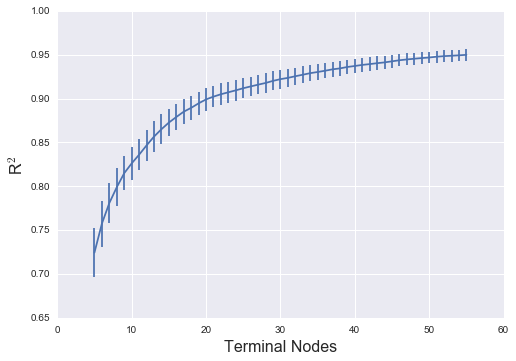

In [19]:
plt.errorbar(leafs,scores,yerr=se)
plt.xlabel('Terminal Nodes', fontsize=16)
plt.ylabel('R$^2$', fontsize=16)

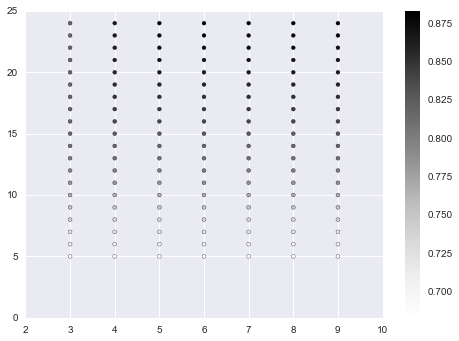

In [109]:
plt.scatter(depths,leafs,s=15,c=scores)
plt.colorbar()

In [83]:
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(data[['SMR','TpeakSWE','peakSWE']].as_matrix(),)

In [101]:
sk.model_selection.cross_val_score(clf,X=data[['SMR','TpeakSWE','peakSWE']].as_matrix(),y=data['RR'].as_matrix() ,cv=5)

array([ 0.73441659,  0.72181378,  0.7186479 ,  0.72246722,  0.7301388 ])

In [84]:
clf.score(data[['SMR','TpeakSWE','peakSWE']].as_matrix(),data['RR'].as_matrix())

0.7284914417009809

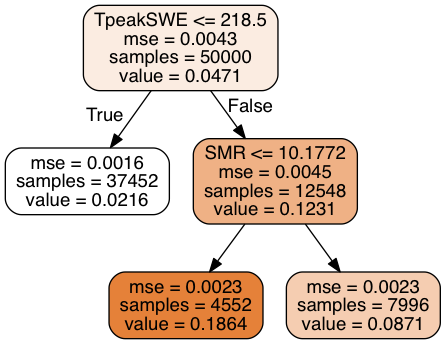

In [63]:
dot_data = tree.export_graphviz(fit, out_file=None,feature_names=['SMR','TpeakSWE','peakSWE'], filled=True, rounded=True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

In [ ]:
sm.

In [38]:
clf.

{'criterion': 'mse',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': 5,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [23]:
data.columns

Index([u'SMR', u'TpeakSWE', u'peakSWE', u'ablSeas', u'Tnosnow', u'ref',
       u'date_ONS', u'DOAS', u'date_AS', u'idx', u'date_peakSWE', u'MAP',
       u'ET', u'Q', u'Qbf', u'Qrf', u'rech', u'sat', u'p', u'rz_storage',
       u'rz_drainage', u'unsat_storage', u'unsat_drainage', u'sat_def',
       u'sat_def_z', u'Pmodel', u'Pex', u'wb', u'RR', u'ablRR', u'Color',
       u'ASL'],
      dtype='object')

In [24]:
norm = mpl.colors.Normalize(vmin=data.ASL.min(), vmax=data.ASL.max())
cmap = cm.hot
m = cm.ScalarMappable(norm=norm, cmap=cmap)

In [25]:
tmp = []
for days in data.ASL:
    tmp.append(m.to_rgba(days))

In [26]:
data.Qbf.describe()

count    50000.000000
mean        17.689556
std         25.044528
min          0.040581
25%          0.098495
50%          4.420902
75%         31.569139
max         93.865474
Name: Qbf, dtype: float64

In [16]:
onethird = np.percentile(data.SMR,33.3)

In [17]:
twothird = np.percentile(data.SMR,66.6)

In [18]:
def define_percentile(dat):

    if dat <= onethird:
        return 1
    elif (dat > onethird) & (dat <= twothird):
        return 2
    else:
        return 3

In [19]:
data['SMR_tercile'] = data.SMR.map(define_percentile)

In [20]:
onethird =  np.percentile(data.TpeakSWE,33.3)

In [21]:
twothird =  np.percentile(data.TpeakSWE,66.6)

In [63]:
def define_percentile(dat):

    if dat <= onethird:
        return 1
    elif (dat > onethird) & (dat <= twothird):
        return 2
    else:
        return 3

In [23]:
data['TpeakSWE_tercile'] = data.TpeakSWE.map(define_percentile)

In [62]:
onethird =  np.percentile(data.peakSWE,33.3)
twothird =  np.percentile(data.peakSWE,66.6)

In [64]:
data['peakSWE_tercile'] = data.peakSWE.map(define_percentile)

In [53]:
minima = data.peakSWE.min()
maxima = data.peakSWE.max()

norm = matplotlib.colors.Normalize(vmin=minima,vmax=maxima,clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues)

colors = []
for val in data.peakSWE:
    colors.append(mapper.to_rgba(val))

In [50]:
mapper.to_rgba(40.3)

(0.93787005368401022, 0.96462899095871868, 0.99015763226677389, 1.0)

In [68]:
plt.figure(figsize=(20,15))
grid = sns.FacetGrid(data,col='peakSWE_tercile',row='TpeakSWE_tercile',sharex=False,sharey=False)
grid.map(sns.kdeplot,'SMR','RR')

KeyError: 'TpeakSWE_tercile'

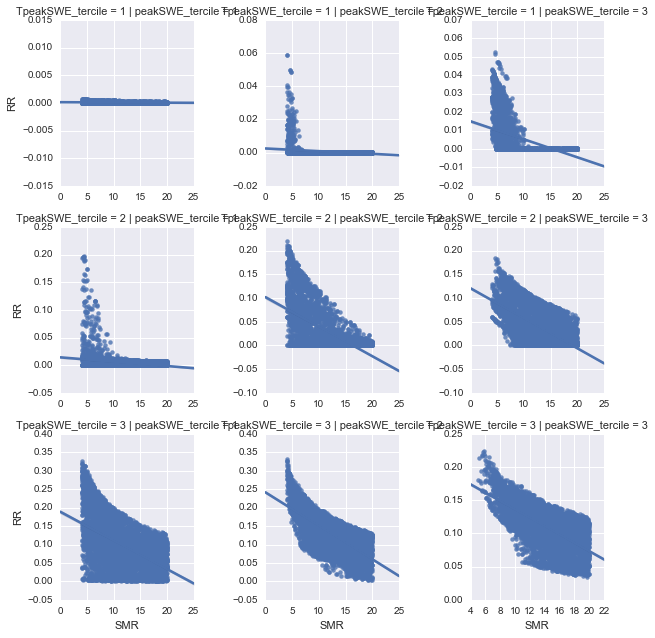

In [76]:
grid = sns.FacetGrid(data,col='peakSWE_tercile',row='TpeakSWE_tercile',sharex=False,sharey=False)
grid.map(sns.regplot, 'SMR','RR')

KeyboardInterrupt: 

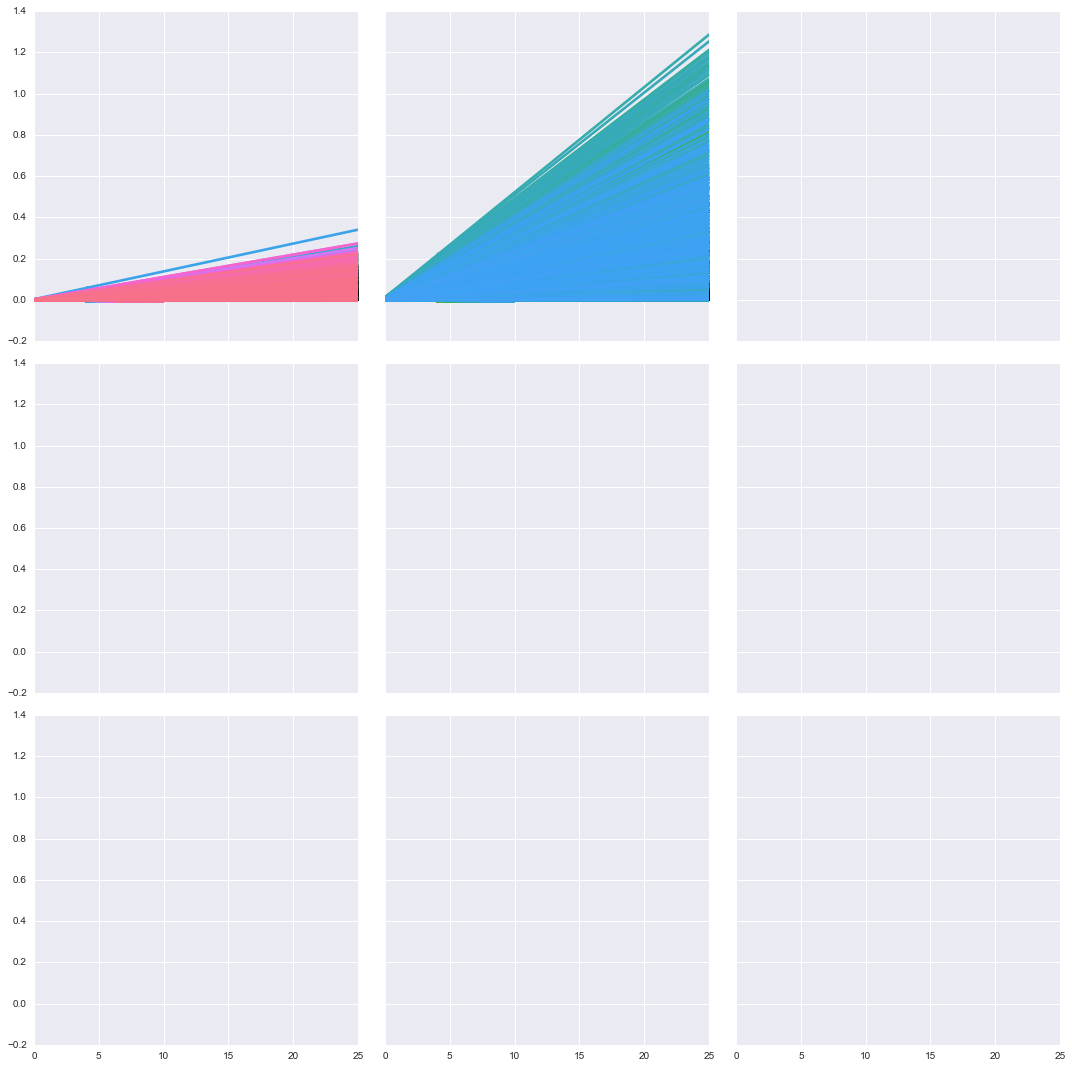

In [47]:
sns.lmplot('SMR','RR',data,hue='peakSWE',col='TpeakSWE_tercile',row='SMR_tercile')

In [41]:
data.TpeakSWE_tercile.describe()

count    50000.000000
mean         1.994960
std          0.814756
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: TpeakSWE_tercile, dtype: float64

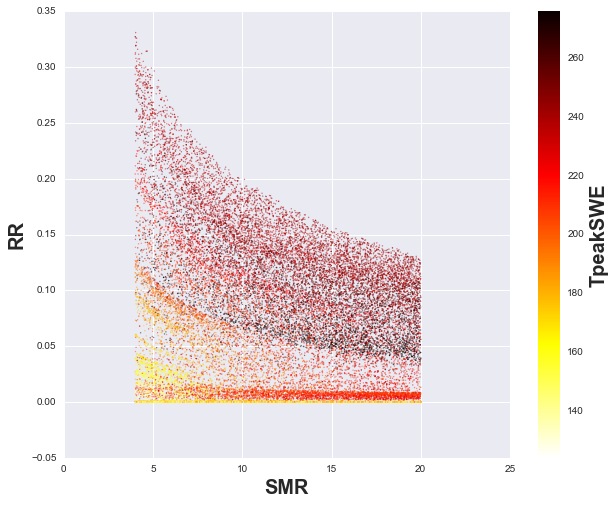

In [7]:
plt.figure(figsize=(10,8))
ykey = 'RR'
xkey = 'SMR'
ckey = 'TpeakSWE'
plt.scatter(data[xkey],data[ykey],s = 2, c = data[ckey],cmap='hot_r',edgecolor='none', alpha=0.5);
c = plt.colorbar();
c.set_label(ckey, fontsize = 20, weight = 'bold')
plt.xlabel(xkey,fontsize=20,weight='bold')
plt.ylabel(ykey, fontsize=20,weight='bold')
#plt.ylim(0,1.1)
c.alpha=1
c.draw_all()
#plt.savefig('./figures/RR_ARD_SMR.png', dpi=300,bbox_inches='tight')

In [26]:
data.columns

Index([u'Tnosnow', u'TpeakSWE', u'peakSWE', u'SMR', u'ref', u'date_ONS',
       u'DOAS', u'date_AS', u'idx', u'date_peakSWE', u'MAP', u'ET', u'Q',
       u'Qbf', u'Qrf', u'rech', u'sat', u'p', u'rz_storage', u'rz_drainage',
       u'unsat_storage', u'unsat_drainage', u'sat_def', u'sat_def_z',
       u'Pmodel', u'Pex', u'wb', u'RR', u'ablRR', u'Color', u'ASL'],
      dtype='object')

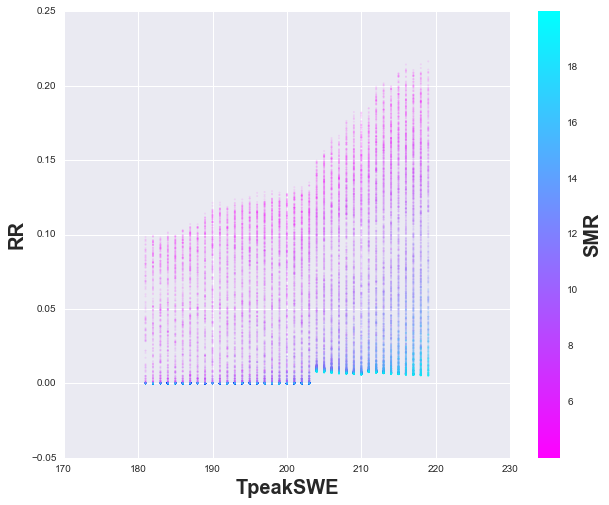

In [62]:
plt.figure(figsize=(10,8))
ykey = 'RR'
xkey = 'TpeakSWE'
ckey = 'SMR'
plt.scatter(data[xkey],data[ykey],s = 4, c = data[ckey],cmap='cool_r',edgecolor='none',alpha = 0.1);
c = plt.colorbar();
c.set_label(ckey, fontsize = 20, weight = 'bold')
plt.xlabel(xkey,fontsize=20,weight='bold')
plt.ylabel(ykey, fontsize=20,weight='bold')
#plt.ylim(0.4,1.1)
c.alpha=1
c.draw_all()
#plt.savefig('./figures/smex2_RR_SMR_DOWPEAKSWE.png', dpi=300,bbox_inches='tight')

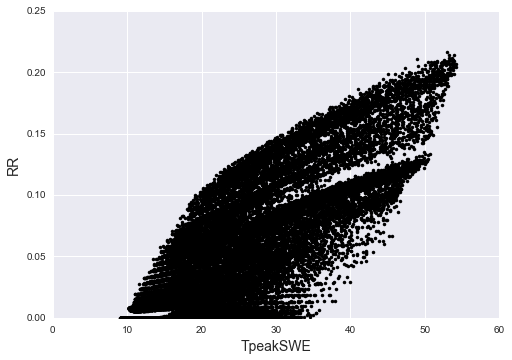

In [75]:
xkey = 'TpeakSWE/SMR'
ykey = 'RR'
plt.plot(data.TpeakSWE/data.SMR,data[ykey],'.k')
plt.xlabel(xkey,fontsize = 14)
plt.ylabel(ykey,fontsize = 14)

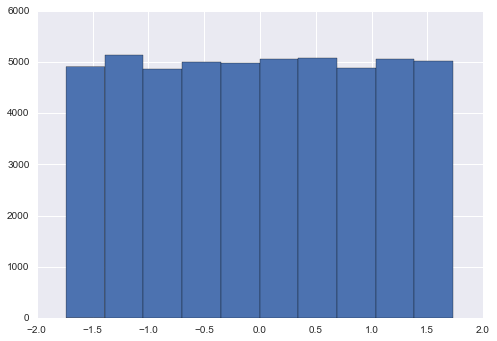

In [40]:
data.SMR2.hist()

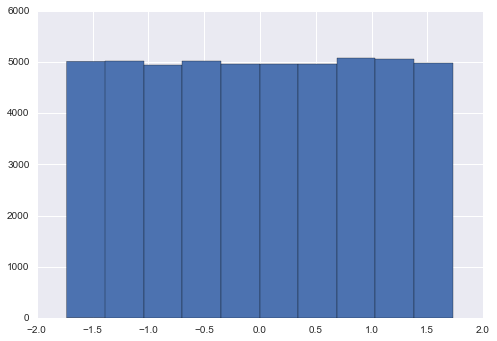

In [41]:
data.peakSWE2.hist()

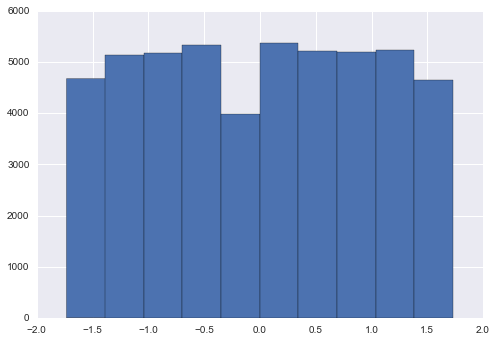

In [42]:
data.TpeakSWE2.hist()

In [67]:
print sm.ols('RR2 ~ SMR2 + 1',data).fit().summary()

mod1 = sm.ols('RR2 ~ TpeakSWE2+ SMR2 + peakSWE2 + 1',data).fit()
print mod1.summary()

                            OLS Regression Results                            
Dep. Variable:                    RR2   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                 1.175e+04
Date:                Wed, 09 Nov 2016   Prob (F-statistic):               0.00
Time:                        16:49:16   Log-Likelihood:                -65670.
No. Observations:               50000   AIC:                         1.313e+05
Df Residuals:                   49998   BIC:                         1.314e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   7.524e-17      0.004   1.87e-14      1.0

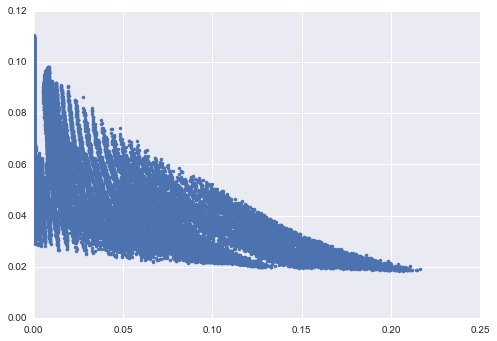

In [32]:
plt.plot(data.RR,data.SMR_TpeakSWE,'.')

In [33]:
mod2 = sm.ols('RR2 ~ SMR_TpeakSWE2 + 1',data).fit()
print mod2.summary()

                            OLS Regression Results                            
Dep. Variable:                    RR2   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                 5.602e+04
Date:                Fri, 04 Nov 2016   Prob (F-statistic):               0.00
Time:                        14:33:10   Log-Likelihood:                -52157.
No. Observations:               50000   AIC:                         1.043e+05
Df Residuals:                   49998   BIC:                         1.043e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      1.366e-16      0.003   4.45e-14

In [66]:
data.columns

Index([u'SMR', u'TpeakSWE', u'peakSWE', u'ablSeas', u'Tnosnow', u'ref',
       u'date_ONS', u'DOAS', u'date_AS', u'idx', u'date_peakSWE', u'MAP',
       u'ET', u'Q', u'Qbf', u'Qrf', u'rech', u'sat', u'p', u'rz_storage',
       u'rz_drainage', u'unsat_storage', u'unsat_drainage', u'sat_def',
       u'sat_def_z', u'Pmodel', u'Pex', u'wb', u'RR', u'ablRR'],
      dtype='object')

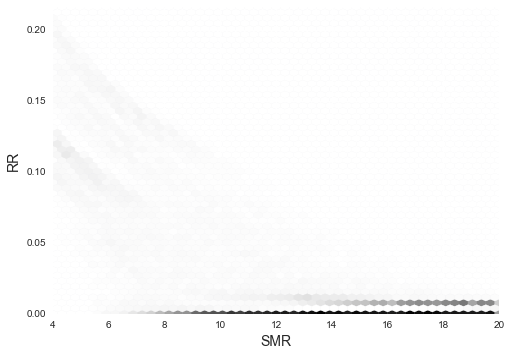

In [71]:
xkey = 'SMR'
ykey = 'RR'
plt.hexbin(data[xkey],data[ykey],gridsize=50)
plt.xlabel(xkey,fontsize = 14)
plt.ylabel(ykey,fontsize = 14)

In [17]:
import time
from IPython.display import clear_output
import matplotlib.animation as animation

In [18]:
data.TpeakSWE.max()

219.0

(0, 0.6)

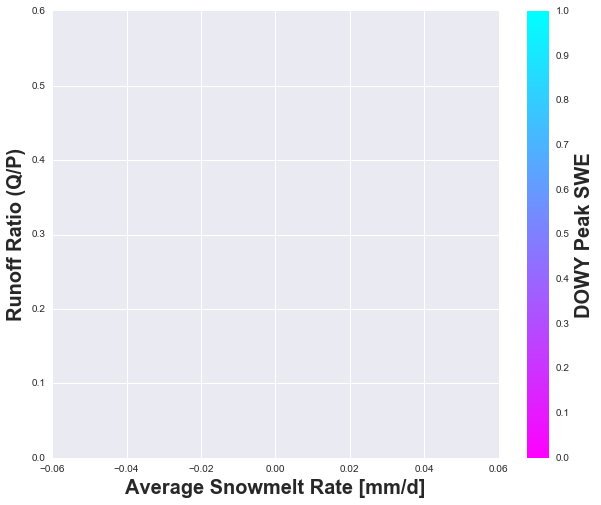

In [19]:
plt.figure(figsize=(10,8))
tmp = data.loc[(data.TpeakSWE >= 172) & (data.TpeakSWE<=174)]
ykey = 'RR'
xkey = 'SMR'

p = plt.scatter(tmp[xkey],tmp[ykey],s = 2, c = tmp.TpeakSWE,cmap='cool_r',edgecolor='none',alpha = 1);
c = plt.colorbar()
c.set_label('DOWY Peak SWE', fontsize = 20, weight = 'bold')
plt.xlabel('Average Snowmelt Rate [mm/d]',fontsize=20,weight='bold')
plt.ylabel('Runoff Ratio (Q/P)', fontsize=20,weight='bold')
plt.ylim(0,0.6)
#plt.savefig('./figures/smex2_RR_SMR_DOWPEAKSWE_d4.png', dpi=300,bbox_inches='tight')

In [15]:
tmp = data.loc[(data.RR>0.29) & (data.RR<0.31) & (data.SMR >6.) & (data.SMR <8.)]

In [180]:
len(tmp)

1547

In [17]:
data.columns

Index([u'Tnosnow', u'TpeakSWE', u'peakSWE', u'SMR', u'ref', u'date_ONS',
       u'DOAS', u'date_AS', u'idx', u'date_peakSWE', u'MAP', u'ET', u'Q',
       u'Qbf', u'Qrf', u'rech', u'sat', u'p', u'rz_storage', u'rz_drainage',
       u'unsat_storage', u'unsat_drainage', u'sat_def', u'sat_def_z', u'Qin',
       u'Qout', u'streamflow', u'rz_field_capacity', u'snow_melt', u'Pmodel',
       u'Pex', u'wb', u'RR', u'Qerr', u'Color', u'ASL'],
      dtype='object')

In [172]:
data.loc[data.idx==1000]

,Tnosnow,TpeakSWE,peakSWE,SMR,ref,date_ONS,DOAS,date_AS,idx,date_peakSWE,...,Qout,streamflow,rz_field_capacity,snow_melt,Pmodel,Pex,wb,RR,Color,ASL
1000,238,172,325.21875,4.927557,2008,2008-05-25,15,2007-10-15,1000,2008-03-20,...,0.463938,0.463938,372.56662,325.21874,1016.312398,613.41875,-159.647362,0.370658,green,66


In [164]:
data['Color']

0        b
1        b
2        b
3        b
4        b
5        b
6        b
7        b
8        b
9        b
10       b
11       b
12       b
13       b
14       b
15       b
16       b
17       b
18       b
19       b
20       b
21       b
22       b
23       b
24       b
25       b
26       b
27       b
28       b
29       b
        ..
29470    b
29471    b
29472    b
29473    b
29474    b
29475    b
29476    b
29477    b
29478    b
29479    b
29480    b
29481    b
29482    b
29483    b
29484    b
29485    b
29486    b
29487    b
29488    b
29489    b
29490    b
29491    b
29492    b
29493    b
29494    b
29495    b
29496    b
29497    b
29498    b
29499    b
Name: Color, dtype: object

(0, 190)

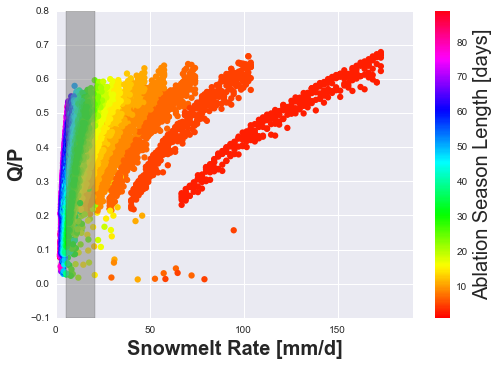

In [48]:
plt.axvspan(niwot.averageMR.min(), niwot.averageMR.max(), facecolor='0.5', alpha=0.5)
plt.scatter(data.SMR,data.RR,s = 40,lw=2,c=data.ASL, edgecolor='none',cmap='hsv')
plt.ylabel('Q/P', fontsize=20, weight='bold')
plt.xlabel('Snowmelt Rate [mm/d]', fontsize = 20, weight = 'bold')
cb = plt.colorbar()
cb.set_label('Ablation Season Length [days]', fontsize = 20)
plt.xlim(0,190)

In [22]:
data.loc[(data.SMR>150) & (data.RR<0.1),'Color'] = 'r' 

In [32]:
data.loc[(data.SMR>190) & (data.RR>0.2),'Color'] = 'g'

In [31]:
data.loc[(data.SMR>150) & (data.RR<0.1)].sort(columns='SMR').Pex

28700    495.400000
26952    517.179592
27854    521.359184
26006    571.938776
28706    534.338776
26957    549.628571
26959    562.608163
28712    573.277551
28713    579.767347
27866    599.236735
28717    605.726531
27869    618.706122
26019    656.306122
25020    671.795918
26972    646.975510
27875    657.644898
27877    670.624490
25029    730.204082
25031    743.183673
26982    711.873469
27884    716.053061
27887    735.522449
26988    750.812245
26989    757.302041
25039    795.102041
27889    748.502041
26992    776.771429
26043    812.061224
27893    774.461224
26995    796.240816
25045    834.040816
28745    787.440816
26047    838.020408
Name: Pex, dtype: float64

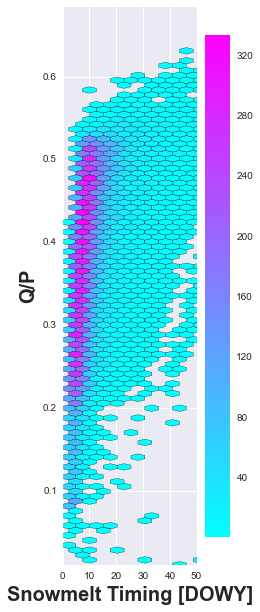

In [59]:
plt.figure(figsize=(3,10))
plt.hexbin(data.SMR,data.RR,gridsize=100,edgecolor='k',cmap='cool', mincnt=1)
plt.ylabel('Q/P', fontsize=20, weight='bold')
plt.xlabel('Snowmelt Timing [DOWY]', fontsize = 20, weight = 'bold')
plt.xlim(0,50)
cb = plt.colorbar()

In [34]:
data.loc[(data.SMR>190) & (data.RR>0.2)]

,Tnosnow,TpeakSWE,peakSWE,SMR,ref,date_ONS,DOAS,date_AS,idx,MAP,...,Qbf,Qrf,rech,sat,p,Pmodel,Pex,wb,RR,Color
25000,223,222,201.000000,201.000000,2008,2008-05-10,15,2007-10-15,25000,341.0,...,139.357183,0,417.123035,0,900.382448,1101.382448,542.000000,-183.358325,0.257117,g
25001,223,222,207.489796,207.489796,2008,2008-05-10,15,2007-10-15,25001,341.0,...,146.411674,0,422.963855,0,900.382448,1107.872244,548.489796,-183.923020,0.266936,g
25002,223,222,213.979592,213.979592,2008,2008-05-10,15,2007-10-15,25002,341.0,...,153.233778,0,428.804666,0,900.382448,1114.362040,554.979592,-184.255328,0.276107,g
25003,223,222,220.469388,220.469388,2008,2008-05-10,15,2007-10-15,25003,341.0,...,159.984386,0,434.645486,0,900.382448,1120.851836,561.469388,-184.516140,0.284939,g
25004,223,222,226.959184,226.959184,2008,2008-05-10,15,2007-10-15,25004,341.0,...,166.752858,0,440.486297,0,900.382448,1127.341632,567.959184,-184.794816,0.293600,g
25005,223,222,233.448980,233.448980,2008,2008-05-10,15,2007-10-15,25005,341.0,...,177.114349,0,446.327117,0,900.382448,1133.831428,574.448980,-188.666511,0.308320,g
25006,223,222,239.938776,239.938776,2008,2008-05-10,15,2007-10-15,25006,341.0,...,188.548379,0,452.167937,0,900.382448,1140.321224,580.938776,-193.610745,0.324558,g
25007,223,222,246.428571,246.428571,2008,2008-05-10,15,2007-10-15,25007,341.0,...,199.535527,0,458.008748,0,900.382448,1146.811019,587.428571,-198.108098,0.339676,g
25008,223,222,252.918367,252.918367,2008,2008-05-10,15,2007-10-15,25008,341.0,...,208.341835,0,463.849568,0,900.382448,1153.300815,593.918367,-200.424610,0.350792,g
25009,223,222,259.408163,259.408163,2008,2008-05-10,15,2007-10-15,25009,341.0,...,217.076641,0,469.690379,0,900.382448,1159.790611,600.408163,-202.669620,0.361548,g


In [126]:
import statsmodels.formula.api as sm

In [127]:
print niwot.averageMR.min()
print niwot.averageMR.max()

5.72340425532
20.6666666667


In [128]:
data['ln_SMR'] = np.log(data.SMR)

In [134]:
data2 = pd.DataFrame()

keys = ['RR','Tnosnow','SMR','TpeakSWE','ln_SMR','sat_def','rz_drainage','peakSWE']

for key in keys:    
    data2[key] = standardize(data[key])

## Clean Data

In [135]:
data2.head()

,RR,Tnosnow,SMR,TpeakSWE,ln_SMR,sat_def,rz_drainage,peakSWE
0,-1.154629,-2.015366,-1.362972,-1.515445,-1.558162,1.037336,-1.026354,-1.575383
1,-1.087629,-2.015366,-1.324488,-1.515445,-1.490949,0.991725,-0.974693,-1.521187
2,-1.023433,-2.015366,-1.286004,-1.515445,-1.425338,0.945222,-0.921988,-1.466990
3,-0.974118,-2.015366,-1.247521,-1.515445,-1.361254,0.898910,-0.868492,-1.412794
4,-0.897325,-2.015366,-1.209037,-1.515445,-1.298629,0.841334,-0.818029,-1.358598


In [131]:
data2['sat_def2'] = data2.sat_def**2

In [139]:
mod1 = sm.ols('RR ~ SMR + Tnosnow + TpeakSWE + peakSWE +1',data2).fit()
print mod1.summary()

                            OLS Regression Results                            
Dep. Variable:                     RR   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 2.308e+05
Date:                Tue, 14 Jul 2015   Prob (F-statistic):               0.00
Time:                        11:13:35   Log-Likelihood:                -30431.
No. Observations:              106676   AIC:                         6.087e+04
Df Residuals:                  106671   BIC:                         6.092e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   9.805e-15      0.001   9.95e-12      1.0

In [140]:
mod2 = sm.ols('SMR ~ peakSWE +1',data2).fit()
print mod2.summary()

                            OLS Regression Results                            
Dep. Variable:                    SMR   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                 3.066e+04
Date:                Tue, 14 Jul 2015   Prob (F-statistic):               0.00
Time:                        11:13:36   Log-Likelihood:            -1.3789e+05
No. Observations:              106676   AIC:                         2.758e+05
Df Residuals:                  106674   BIC:                         2.758e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   6.672e-15      0.003   2.47e-12      1.0

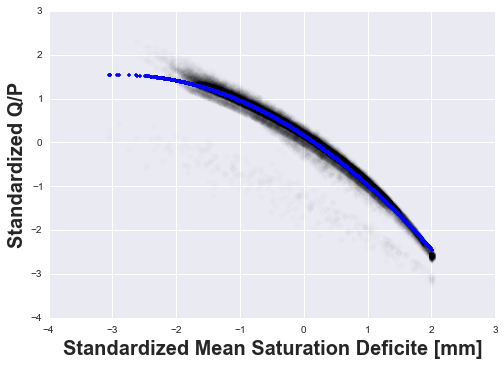

In [47]:
plt.plot(data2.sat_def,data2.RR,'ok', alpha = 0.01)
plt.plot(mod.model.data.exog[:,1],mod.fittedvalues,'.b')
plt.xlabel('Standardized Mean Saturation Deficite [mm]', fontsize=20, weight='bold')
plt.ylabel('Standardized Q/P', fontsize=20,weight='bold')

In [43]:
x = np.linspace(-4,3,1000)
xnew = np.c_[np.ones_like(x),x,x**2,]

In [46]:
1.23126917**2

1.516023768992489

In [42]:
mod.model.data.exog

array([[ 1.        ,  1.23126917,  1.51602378],
       [ 1.        ,  1.1454793 ,  1.31212284],
       [ 1.        ,  1.09894107,  1.20767148],
       ..., 
       [ 1.        , -1.13064183,  1.27835096],
       [ 1.        , -1.32309526,  1.75058107],
       [ 1.        , -1.10173032,  1.21380969]])

In [45]:
xnew

array([[  1.        ,  -4.        ,  16.        ],
       [  1.        ,  -3.99299299,  15.94399304],
       [  1.        ,  -3.98598599,  15.88808428],
       ..., 
       [  1.        ,   2.98598599,   8.91611231],
       [  1.        ,   2.99299299,   8.95800706],
       [  1.        ,   3.        ,   9.        ]])

In [44]:
mod.predict(xnew)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [51]:
import glob

In [52]:
files = glob.glob('/Volumes/data/RHESSys_out/smex2/smex2_*_patch.daily')

In [53]:
files

['/Volumes/data/RHESSys_out/smex2/smex2_0_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10000_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10001_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10002_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10003_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10004_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10005_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10006_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10007_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10008_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10009_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_1000_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10010_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10011_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10012_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10013_patch.daily',
 '/Volumes/data/RHESSys_out/smex2/smex2_10014

In [54]:
fl = files[-10]

In [56]:
int(fl.split('_')[-2])

'9993'

In [145]:
tmp = pd.read_table(fl, delim_whitespace=True)

In [148]:
print list(tmp.columns)

['day', 'month', 'year', 'basinID', 'hillID', 'zoneID', 'patchID', 'rain_thr', 'detention_store', 'sat_def_z', 'sat_def', 'rz_storage', 'potential_rz_store', 'rz_field_capacity', 'rz_wilting_point', 'unsat_stor', 'rz_drainage', 'unsat_drain', 'sublimation', 'return', 'evap', 'evap_surface', 'soil_evap', 'snow', 'snow_melt', 'trans_sat', 'trans_unsat', 'Qin', 'Qout', 'psn', 'root_zone.S', 'root.depth', 'litter.rain_stor', 'litter.S', 'area', 'pet', 'lai', 'baseflow', 'streamflow', 'pcp', 'recharge', 'Kdowndirpch', 'Kdowndiffpch', 'Kupdirpch', 'Kupdifpch', 'Luppch', 'Kdowndirsubcan', 'Kdowndifsubcan', 'Ldownsubcan', 'Kstarcan', 'Kstardirsno', 'Kstardiffsno', 'Lstarcanopy', 'Lstarsnow', 'Lstarsoil', 'wind', 'windsnow', 'windzone', 'ga', 'gasnow', 'trans_reduc_perc', 'pch_field_cap', 'overland_flow', 'height', 'ustar', 'snow_albedo', 'Kstarsoil', 'Kdowndirsurf', 'Kdowndifsurf', 'exfil_unsat', 'snow_Rnet', 'snow_QLE', 'snow_QH', 'snow_Qrain', 'snow_Qmelt', 'LEcanopy', 'SED', 'snow_age']


In [ ]:
def process_Patch(fl):
    
    num = int(fl.split('_')[-2]) # split out the file number
    
    data = pd.read_table(fl, delim_whitespace=True) # load the patch data
    
    rz_storage = data.rz_storage.mean() # root zone storage
    rz_field_capacity = data.rz_field_capacity.mean() # root zone field capacity
    rz_drainage = data.rz_drainage.mean() # root zone drainage 
    unsat_drainage = data.unsat_drain.mean() # unsaturated zone drainage
    sat_def = data.sat_def.mean() # saturation deficite (mm)
    sat_def_z = data.sat_def_z.mean() # saturation deficite depth, is this the depth to ground water?
    
    
    
    